In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import Imputer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.cross_validation import KFold

/Users/nasim/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Research 

The data has been taken from kaggle competetion. I looked at several kernels to research the problem and have a better
feelinf for the data. This is quite a well known kaggle competetion there were many kernels that was talking about how to best solve the problem . As with any Data science and machine learning project a quick sweep of what has been done on the subject and how to approach the problem and thinking about what is the bigger picture before training our model. The kaggle Kernels I found most helpful: 
https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish
https://www.kaggle.com/startupsci/titanic-data-science-solutions

However This data set has different values for example the P_class was removed in this data set. 
Next step would be to load the data into our note book :

# Load

In [2]:
train_base = pd.read_csv("train_base.csv")
train_passenger = pd.read_csv("train_passenger.csv")
train_ticket = pd.read_csv("train_ticket.csv")
test_base = pd.read_csv("test_base.csv")
test_passenger = pd.read_csv("test_passenger.csv")
test_ticket = pd.read_csv("test_ticket.csv")

# Undrestanding data 
I would look at the info to see what kind of data is there and if we have any missing values

In [3]:
train_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Ticket         891 non-null object
dtypes: int64(2), object(1)
memory usage: 21.0+ KB


In [4]:
train_passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
PassengerId    891 non-null int64
Name           891 non-null object
Sex            888 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 41.8+ KB


In [5]:
train_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 4 columns):
Ticket      712 non-null object
Fare        712 non-null float64
Cabin       161 non-null object
Embarked    711 non-null object
dtypes: float64(1), object(3)
memory usage: 22.3+ KB


In [6]:
test_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 4 columns):
Ticket      374 non-null object
Fare        373 non-null float64
Cabin       78 non-null object
Embarked    374 non-null object
dtypes: float64(1), object(3)
memory usage: 11.8+ KB


In [7]:
test_base.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Ticket         418 non-null object
dtypes: int64(1), object(1)
memory usage: 6.6+ KB


In [8]:
test_passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
PassengerId    418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


In [9]:
test_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 4 columns):
Ticket      374 non-null object
Fare        373 non-null float64
Cabin       78 non-null object
Embarked    374 non-null object
dtypes: float64(1), object(3)
memory usage: 11.8+ KB


# Cleaning Data 
Cabin has only 161 values. Since it's information is encoded in Fare information , let's go ahead 
and just drop the cabin values.It was noted that also several Ticket numbers has several Cabins. Also several ppl shared in some occasions one Cabin. I won't take this into account at this point. There is very few data points in regard to cabin. I think the more cabin you have the more you had paid so this would be encoded in the ticket price anyway.Maybe in later versions i can make a new feature about the ppl who have more than one cabin. This is very sparsed so I just drop the cabin

In [10]:
no_cabin_train_ticket=train_ticket.drop(['Cabin'],axis= 1)
no_cabin_train_ticket.drop_duplicates(inplace=True)
no_cabin_train_ticket.Ticket.value_counts()


PC 17760             2
7534                 2
113798               2
2627                 1
2648                 1
323592               1
250647               1
248747               1
2650                 1
315086               1
C.A. 31026           1
2926                 1
PC 17759             1
SOTON/OQ 3101316     1
349224               1
28424                1
349203               1
347069               1
382649               1
349912               1
2687                 1
4135                 1
244278               1
11813                1
226593               1
A.5. 11206           1
A/4 45380            1
372622               1
693                  1
C.A. 31921           1
                    ..
371362               1
2647                 1
STON/O 2. 3101274    1
223596               1
239856               1
349207               1
367231               1
330958               1
SC/PARIS 2131        1
17453                1
14311                1
349227               1
A/5. 13032 

# Tidying the data 
Seems like some Train exmple has duplicate value. 

In [11]:
no_cabin_train_ticket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 711
Data columns (total 3 columns):
Ticket      684 non-null object
Fare        684 non-null float64
Embarked    683 non-null object
dtypes: float64(1), object(2)
memory usage: 21.4+ KB


In [12]:
no_cabin_train_ticket.head(10)

,Ticket,Fare,Embarked
0,110152,86.5000,S
2,110413,79.6500,S
4,110465,52.0000,S
6,110564,26.5500,S
7,110813,75.2500,C
8,111240,33.5000,S
9,111320,38.5000,S
10,111361,57.9792,C
11,111369,30.0000,C
12,111426,26.5500,C


In [13]:
no_cabin_train_ticket.Ticket.value_counts()


PC 17760             2
7534                 2
113798               2
2627                 1
2648                 1
323592               1
250647               1
248747               1
2650                 1
315086               1
C.A. 31026           1
2926                 1
PC 17759             1
SOTON/OQ 3101316     1
349224               1
28424                1
349203               1
347069               1
382649               1
349912               1
2687                 1
4135                 1
244278               1
11813                1
226593               1
A.5. 11206           1
A/4 45380            1
372622               1
693                  1
C.A. 31921           1
                    ..
371362               1
2647                 1
STON/O 2. 3101274    1
223596               1
239856               1
349207               1
367231               1
330958               1
SC/PARIS 2131        1
17453                1
14311                1
349227               1
A/5. 13032 

The first three values still has value _count that is not 1 . Let's look at them what is wrong


In [14]:

no_cabin_train_ticket[no_cabin_train_ticket['Ticket'].isin(['PC 17760','113798','7534'])]

,Ticket,Fare,Embarked
51,113798,31.0000,C
52,113798,31.0000,S
521,7534,9.2167,S
522,7534,9.8458,S
640,PC 17760,135.6333,S
641,PC 17760,135.6333,C


Ok here I see that they have either different embarked or different fair. it's either a typo or several ppl joined in on
several ports. let's just keep the first instance of them. 

In [15]:
no_cabin_train_ticket.drop([52,522,641], axis=0,inplace=True)

In [16]:
#no_cabin_train_ticket.reset_index(inplace=True)
no_cabin_train_ticket[no_cabin_train_ticket['Ticket'].isin(['PC 17760','113798','7534'])]

,Ticket,Fare,Embarked
51,113798,31.0000,C
521,7534,9.2167,S
640,PC 17760,135.6333,S


Ok the three rows has been dropped and cabin has also been dropped successfully. Now we are ready to join the tables.But before that I will remove the cabin also in the test_ticket and check if there are no duplicate values

In [17]:

no_cabin_test_ticket=test_ticket.drop(['Cabin'],axis= 1)
no_cabin_test_ticket.drop_duplicates(inplace=True)
no_cabin_test_ticket.Ticket.value_counts()
# looks good

250650           1
376563           1
A/4 31416        1
1222             1
C.A. 49867       1
3470             1
226875           1
2676             1
C.A. 6212        1
349238           1
2684             1
2698             1
347090           1
233478           1
13508            1
113790           1
110813           1
F.C.C. 13534     1
PC 17597         1
19924            1
PC 17606         1
239059           1
112901           1
350045           1
28404            1
PC 17603         1
248746           1
29103            1
F.C. 12998       1
PC 17585         1
                ..
32302            1
345501           1
248659           1
2682             1
382653           1
A/4 48871        1
386525           1
315092           1
367227           1
230136           1
2670             1
11767            1
349229           1
PC 17608         1
2003             1
349211           1
SC 14888         1
F.C.C. 13540     1
13905            1
17464            1
PC 17761         1
SC/PARIS 216

# Data Wrangling 
## Join
I joined the train and test set for easier cleaning and Tidying. This will not have an impact on our model since before any visualisation and model building the data will be seperated into test and train set again.

In [18]:
df_train= pd.merge(train_base, train_passenger, on='PassengerId')

In [19]:
#do the same for the test data set
df_test=pd.merge(test_base, test_passenger, on='PassengerId')

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Ticket         891 non-null object
Name           891 non-null object
Sex            888 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 62.6+ KB


In [21]:
df_train.head()

,PassengerId,Survived,Ticket,Name,Sex,Age,SibSp,Parch
0,1,0,A/5 21171,"Braund, Mr. Owen Harris",male,22.0,1,0
1,520,0,349242,"Pavlovic, Mr. Stefo",male,32.0,0,0
2,522,0,349252,"Vovk, Mr. Janko",male,22.0,0,0
3,523,0,2624,"Lahoud, Mr. Sarkis",male,NaN,0,0
4,525,0,2700,"Kassem, Mr. Fared",male,NaN,0,0


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Ticket         418 non-null object
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 26.1+ KB


In [23]:
df_train = pd.merge(df_train, no_cabin_train_ticket, how='inner', on='Ticket')

In [24]:
df_test = pd.merge(df_test, no_cabin_test_ticket, how='inner', on='Ticket')

In [25]:
df_train.tail()

,PassengerId,Survived,Ticket,Name,Sex,Age,SibSp,Parch,Fare,Embarked
886,554,1,2620,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,7.2250,C
887,548,1,SC/PARIS 2146,"Padro y Manent, Mr. Julian",male,NaN,0,0,13.8625,C
888,217,1,STON/O2. 3101283,"Honkanen, Miss. Eliina",female,27.0,0,0,7.9250,S
889,219,1,11813,"Bazzani, Miss. Albina",female,32.0,0,0,76.2917,C
890,446,1,33638,"Dodge, Master. Washington",male,4.0,0,2,81.8583,S


In [26]:
df_test.head()

,PassengerId,Ticket,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,330911,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,363272,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,240276,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,315154,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3101298,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


It would be easier to add the test to train set in order to do the wrangling. I would revert this once i want to run my models


In [27]:
#df = df_train.append(df_test, sort=False,inplace=True)
df = df_train.append(df_test, ignore_index=True)

In [28]:
df.loc[889:892]

,Age,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket
889,32.0,C,76.2917,"Bazzani, Miss. Albina",0,219,female,0,1.0,11813
890,4.0,S,81.8583,"Dodge, Master. Washington",2,446,male,0,1.0,33638
891,34.5,Q,7.8292,"Kelly, Mr. James",0,892,male,0,NaN,330911
892,47.0,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,female,1,NaN,363272


In [29]:
len(df_test)+ len(df_train)

1309

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Age            1046 non-null float64
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Sex            1306 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 102.3+ KB


## Missing Values part 2
Now that the data has been joined. Sex , Age , Embarked has missing values. and Fare

In [31]:
df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,male,1,0.0,A/5 21171
1,32.0,S,7.8958,"Pavlovic, Mr. Stefo",0,520,male,0,0.0,349242
2,22.0,S,7.8958,"Vovk, Mr. Janko",0,522,male,0,0.0,349252
3,NaN,C,7.2250,"Lahoud, Mr. Sarkis",0,523,male,0,0.0,2624
4,NaN,C,7.2292,"Kassem, Mr. Fared",0,525,male,0,0.0,2700


In [32]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Survived,418,31.932773
Age,263,20.091673
Sex,3,0.229183
Embarked,2,0.152788
Fare,1,0.076394
Ticket,0,0.000000
SibSp,0,0.000000
PassengerId,0,0.000000
Parch,0,0.000000
Name,0,0.000000


In [33]:
total_train = df_train.isnull().sum().sort_values(ascending=False)
percent_train = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)*100
missing_data_train = pd.concat([total_train, percent_train], axis=1, keys=['Total', 'Percent'])
missing_data_train

,Total,Percent
Age,177,19.865320
Sex,3,0.336700
Embarked,2,0.224467
Fare,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Name,0,0.000000
Ticket,0,0.000000
Survived,0,0.000000
PassengerId,0,0.000000


#### Filling Embarked
ok so here we see how many missing values we have . for the embareked we can just replace it with the mode of the data. 
Aka most  frequent port

In [34]:
df.Embarked.value_counts()

S    915
C    269
Q    123
Name: Embarked, dtype: int64

the mode for the embarked is S so we fill the missing value with that. 


In [35]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)

#### Filling Sex
So for the Gender we see that we can easily extract it from Sex 'name'

In [36]:
df[df.Sex.isnull()]

,Age,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket
249,NaN,C,30.6958,"Hoyt, Mr. William Fisher",0,794,NaN,0,0.0,PC 17600
566,NaN,S,8.0500,"Rogers, Mr. William John",0,46,NaN,0,0.0,S.C./A.4. 23567
769,22.0,Q,7.7500,"Connolly, Miss. Kate",0,290,NaN,0,1.0,370373


#### Tidying up title 

In [37]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Major         2
Mlle          2
Countess      1
Don           1
Lady          1
Jonkheer      1
Sir           1
Capt          1
Dona          1
Mme           1
Name: Title, dtype: int64

In [38]:
df['Title'] = df['Title'].replace(['Mlle','Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df.Title.value_counts()

Mr          757
Miss        264
Mrs         198
Master       61
Dr            8
Rev           8
Col           4
Major         2
Don           1
Countess      1
Lady          1
Jonkheer      1
Capt          1
Dona          1
Sir           1
Name: Title, dtype: int64

In [39]:
def is_female(title):
    if title in ['Countess','Mrs','Miss','Lady','Dona']: 
        return 'female'
    else :
        return 'male'

In [40]:
ind=df[df.Sex.isnull()].index

In [41]:

df.at[ind, 'Sex'] = df.loc[ind]['Title'].map(is_female)

In [42]:
df.loc[ind]

,Age,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Title
249,NaN,C,30.6958,"Hoyt, Mr. William Fisher",0,794,male,0,0.0,PC 17600,Mr
566,NaN,S,8.0500,"Rogers, Mr. William John",0,46,male,0,0.0,S.C./A.4. 23567,Mr
769,22.0,Q,7.7500,"Connolly, Miss. Kate",0,290,female,0,1.0,370373,Miss


So here the missing values for sex has been correctly filled

#### Filling Fare
Fare is has one single value missing so i Replace it with the mode of Fare which is 

In [43]:
df.Fare.mode()[0]

8.05

In [44]:
df.Fare.fillna(df.Fare.mode()[0], inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age            1046 non-null float64
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 112.6+ KB


### Missing Values of  Age
So the missing value in age consist 20% of the data. 
1. quick and dirty way would be to drop it. We lose ( 20 % of our trianing + test data)
I decided against this cause there are missing value in the test data set and if age in not present i would probably not be able to predict a correct class for them. 
2. I can predict the age using other features with a regression model. I decided against this. It might introduce a bias cause we use the other features to predict age , then use all of this to predict the survival.
3. I can impute the data by adding Median , mean or mode to it . It will again add some error and could be that we introduce a lot of the same value which might not be representetive of our data. 
4. I thought about making an age distribution with the mean and std and draw the age randomly. I think this will work better than imputing the values with just the mean of median or mode. however depending on other values this might be wrong cause for example if the person is a dr might be older than 25 but it was assigned a wrong age. 
5. Finally i decided to make the age group into different categories with one unknown category and use that in the dataset. A lot of kernels in the kaggle data set used this method so it might actually work. Let's just assume this and go on this way. 



In [46]:
# I just copied this from kaggle i feel it is good enough

def categorize_ages(df):
    df['Age_cat']=df.Age
    df.Age_cat = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age_cat, bins, labels=group_names)
    df.Age_cat = categories
    return df


df['Family_member']=df['SibSp']+df['Parch']
categorize_ages(df)

,Age,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Title,Family_member,Age_cat
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,male,1,0.0,A/5 21171,Mr,1,Student
1,32.0,S,7.8958,"Pavlovic, Mr. Stefo",0,520,male,0,0.0,349242,Mr,0,Young Adult
2,22.0,S,7.8958,"Vovk, Mr. Janko",0,522,male,0,0.0,349252,Mr,0,Student
3,NaN,C,7.2250,"Lahoud, Mr. Sarkis",0,523,male,0,0.0,2624,Mr,0,Unknown
4,NaN,C,7.2292,"Kassem, Mr. Fared",0,525,male,0,0.0,2700,Mr,0,Unknown
5,40.5,Q,7.7500,"Farrell, Mr. James",0,526,male,0,0.0,367232,Mr,0,Adult
6,NaN,S,221.7792,"Farthing, Mr. John",0,528,male,0,0.0,PC 17483,Mr,0,Unknown
7,39.0,S,7.9250,"Salonen, Mr. Johan Werner",0,529,male,0,0.0,3101296,Mr,0,Adult
8,23.0,S,11.5000,"Hocking, Mr. Richard George",1,530,male,2,0.0,29104,Mr,3,Student
9,NaN,C,7.2292,"Toufik, Mr. Nakli",0,532,male,0,0.0,2641,Mr,0,Unknown


In [47]:
df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Title,Family_member,Age_cat
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,male,1,0.0,A/5 21171,Mr,1,Student
1,32.0,S,7.8958,"Pavlovic, Mr. Stefo",0,520,male,0,0.0,349242,Mr,0,Young Adult
2,22.0,S,7.8958,"Vovk, Mr. Janko",0,522,male,0,0.0,349252,Mr,0,Student
3,NaN,C,7.2250,"Lahoud, Mr. Sarkis",0,523,male,0,0.0,2624,Mr,0,Unknown
4,NaN,C,7.2292,"Kassem, Mr. Fared",0,525,male,0,0.0,2700,Mr,0,Unknown


 so the age has turned into different categories and famlily member which is the number of family members has been added.Now that I am happy about the data that is clean and tidy, I would revert back to test and train set.
 #### Train , Test Set 

In [48]:
train=df[:891]
test=df[891:]

In [49]:
train.tail()

,Age,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Title,Family_member,Age_cat
886,22.0,C,7.2250,"Leeni, Mr. Fahim (""Philip Zenni"")",0,554,male,0,1.0,2620,Mr,0,Student
887,NaN,C,13.8625,"Padro y Manent, Mr. Julian",0,548,male,0,1.0,SC/PARIS 2146,Mr,0,Unknown
888,27.0,S,7.9250,"Honkanen, Miss. Eliina",0,217,female,0,1.0,STON/O2. 3101283,Miss,0,Young Adult
889,32.0,C,76.2917,"Bazzani, Miss. Albina",0,219,female,0,1.0,11813,Miss,0,Young Adult
890,4.0,S,81.8583,"Dodge, Master. Washington",2,446,male,0,1.0,33638,Master,2,Baby


In [50]:
test.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Title,Family_member,Age_cat
891,34.5,Q,7.8292,"Kelly, Mr. James",0,892,male,0,NaN,330911,Mr,0,Young Adult
892,47.0,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,female,1,NaN,363272,Mrs,1,Adult
893,62.0,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,male,0,NaN,240276,Mr,0,Senior
894,27.0,S,8.6625,"Wirz, Mr. Albert",0,895,male,0,NaN,315154,Mr,0,Young Adult
895,22.0,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,female,1,NaN,3101298,Mrs,2,Student


#### Explotoray data analysis
Let's just do a bit of visualisation to see if we find something interesting. 

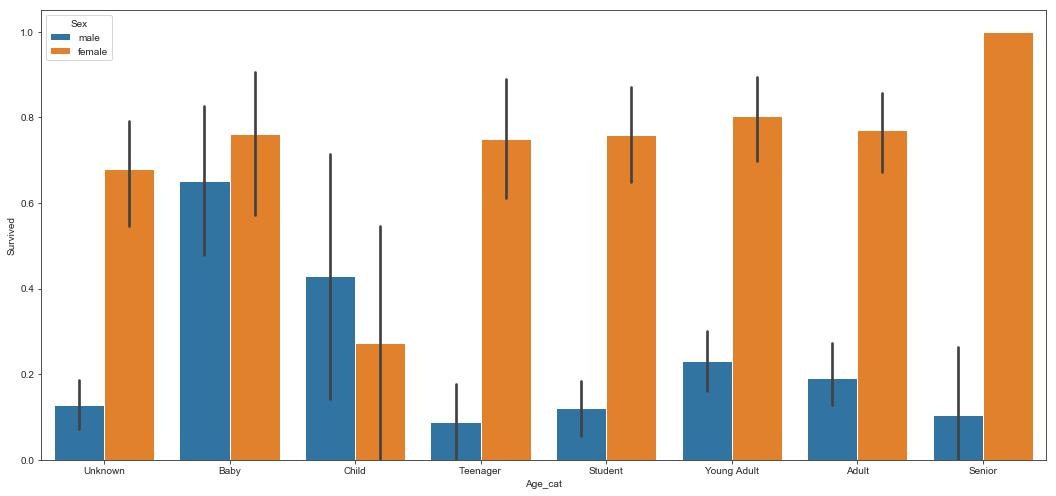

In [51]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(18, 8.27)
sns.barplot(x="Age_cat", y="Survived", hue="Sex", data=train);

So females had better chances of survival excpet if you were a child between the age of 5-12 then your chances would have 
been worse. Teenage boys had the lowest mean of survival. Senior ladies had the highest rate of survival , which I found a bit odd. Let's see if you were a senior lady did you always survived?


In [52]:
train[(train["Age_cat"]=='Senior') & (train['Sex']=='female')]

,Age,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Title,Family_member,Age_cat
686,62.0,S,80.0000,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,female,0,1.0,113572,Mrs,0,Senior
700,63.0,S,77.9583,"Andrews, Miss. Kornelia Theodosia",0,276,female,1,1.0,13502,Miss,1,Senior
776,63.0,S,9.5875,"Turkula, Mrs. (Hedwig)",0,484,female,0,1.0,4134,Mrs,0,Senior


Yup the senior ladies always survived. Should we add this to our data model ? It is only three data points so we can not know for sure :P

In [53]:
train.describe()

,Age,Fare,Parch,PassengerId,SibSp,Survived,Family_member
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.203502,0.381594,446.000000,0.523008,0.383838,0.904602
std,14.526497,49.693751,0.806057,257.353842,1.102743,0.486592,1.613459
min,0.420000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,0.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,1.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,8.000000,1.000000,10.000000


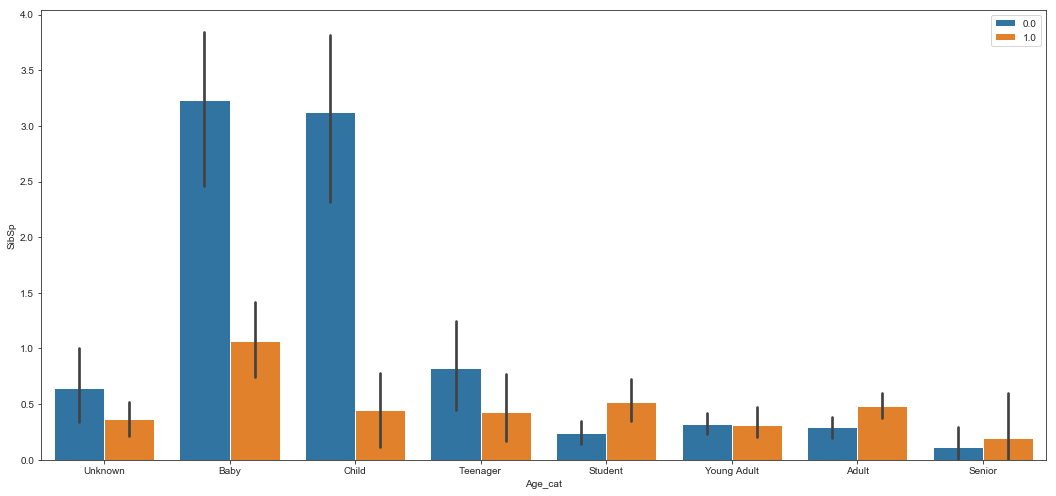

In [54]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(18, 8.27)
sns.barplot(x="Age_cat", y="SibSp", hue="Survived", data=train);
plt.legend(loc='upper right')

The above plot shows that if babies had no family member on board that single babies and children with no borthers and sisters had the highest chance of survival. Let's see if the amount of money has a also an effect on survival rate. For this i Would bin the fares so we get a nice plot. 

In [55]:
train.describe()

,Age,Fare,Parch,PassengerId,SibSp,Survived,Family_member
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.203502,0.381594,446.000000,0.523008,0.383838,0.904602
std,14.526497,49.693751,0.806057,257.353842,1.102743,0.486592,1.613459
min,0.420000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,0.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,1.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,8.000000,1.000000,10.000000


so the min Of fare is nothing ? probably for staff? and the average is 32. the median is however 14.
The average is high because there were fares as high as 512. That's why the average is higher. 

In [56]:
# bins have been split according to each quartile
bins = [-1, 0, 8, 15, 31, 10000]

train.loc[:,'Fare_cat'] = pd.cut(train['Fare'], bins)

train.head()

/Users/nasim/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/nasim/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Age,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Title,Family_member,Age_cat,Fare_cat
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,male,1,0.0,A/5 21171,Mr,1,Student,"(0, 8]"
1,32.0,S,7.8958,"Pavlovic, Mr. Stefo",0,520,male,0,0.0,349242,Mr,0,Young Adult,"(0, 8]"
2,22.0,S,7.8958,"Vovk, Mr. Janko",0,522,male,0,0.0,349252,Mr,0,Student,"(0, 8]"
3,NaN,C,7.2250,"Lahoud, Mr. Sarkis",0,523,male,0,0.0,2624,Mr,0,Unknown,"(0, 8]"
4,NaN,C,7.2292,"Kassem, Mr. Fared",0,525,male,0,0.0,2700,Mr,0,Unknown,"(0, 8]"


In [57]:
train[train.Fare<1]

,Age,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Title,Family_member,Age_cat,Fare_cat
62,49.0,S,0.0,"Johnson, Mr. Alfred",0,598,male,0,0.0,LINE,Mr,0,Adult,"(-1, 0]"
63,36.0,S,0.0,"Leonard, Mr. Lionel",0,180,male,0,0.0,LINE,Mr,0,Adult,"(-1, 0]"
64,19.0,S,0.0,"Johnson, Mr. William Cahoone Jr",0,303,male,0,0.0,LINE,Mr,0,Student,"(-1, 0]"
65,25.0,S,0.0,"Tornquist, Mr. William Henry",0,272,male,0,1.0,LINE,Mr,0,Student,"(-1, 0]"
185,NaN,S,0.0,"Campbell, Mr. William",0,467,male,0,0.0,239853,Mr,0,Unknown,"(-1, 0]"
186,NaN,S,0.0,"Cunningham, Mr. Alfred Fleming",0,414,male,0,0.0,239853,Mr,0,Unknown,"(-1, 0]"
187,NaN,S,0.0,"Parkes, Mr. Francis ""Frank""",0,278,male,0,0.0,239853,Mr,0,Unknown,"(-1, 0]"
210,NaN,S,0.0,"Frost, Mr. Anthony Wood ""Archie""",0,482,male,0,0.0,239854,Mr,0,Unknown,"(-1, 0]"
239,39.0,S,0.0,"Andrews, Mr. Thomas Jr",0,807,male,0,0.0,112050,Mr,0,Adult,"(-1, 0]"
245,NaN,S,0.0,"Fry, Mr. Richard",0,816,male,0,0.0,112058,Mr,0,Unknown,"(-1, 0]"


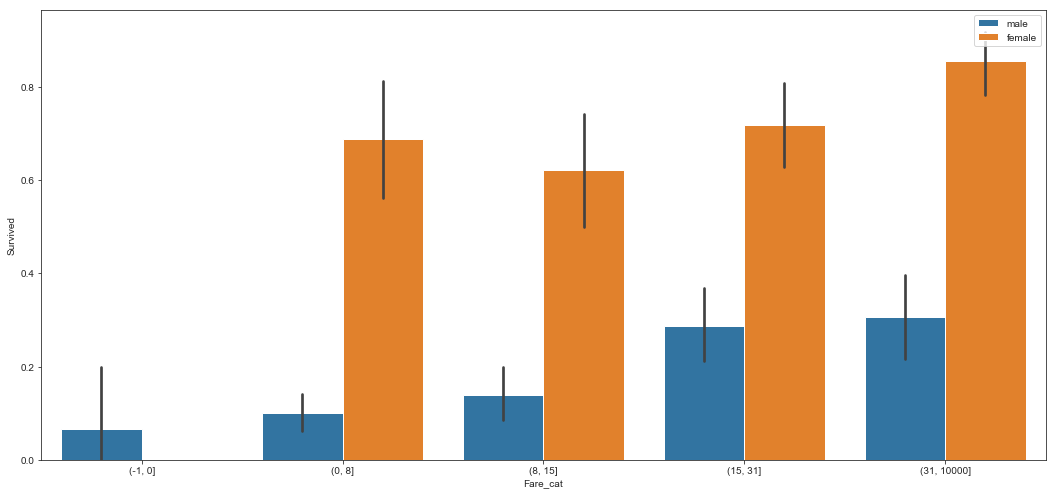

In [58]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18, 8.27)
sns.barplot(x="Fare_cat", y="Survived", hue="Sex", data=train);
plt.legend(loc='upper right')

In [59]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.550898
1,Q,0.389610
2,S,0.340031


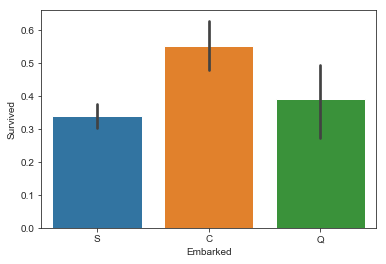

In [60]:

sns.barplot(x="Embarked", y="Survived", data=train)

PPl who embarked from C had higher chance of survival.


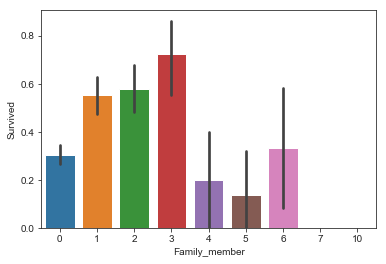

In [61]:
sns.barplot(x="Family_member", y="Survived", data=train)

ppl with three family member had the highest chance of survival. 

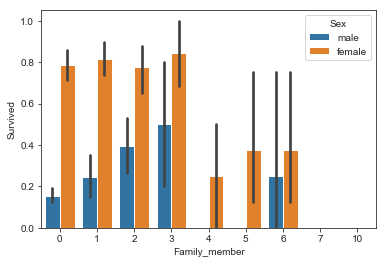

In [62]:
sns.barplot(x="Family_member", y="Survived",hue='Sex', data=train)

Women who were alone had a better chance of survival. However Men who were alone had the lowest chance of survival.

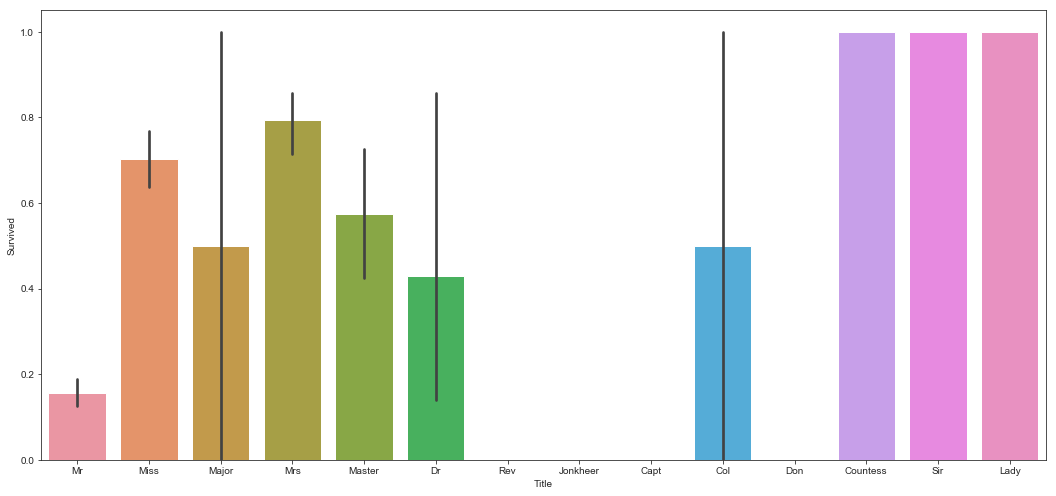

In [63]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18, 8.27)
sns.barplot(x="Title", y="Survived", data=train)


If you were a Mr you had the lowest chance of survival however lady and countess had the best chance . 
The other have not survived.None of the Revrent have survived so did the jonkheer don and capt

In [64]:
train[train['Title']=='Rev']
#train.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Title,Family_member,Age_cat,Fare_cat
232,57.0,Q,12.350,"Kirkland, Rev. Charles Leonard",0,627,male,0,0.0,219533,Rev,0,Adult,"(8, 15]"
305,27.0,S,13.000,"Montvila, Rev. Juozas",0,887,male,0,0.0,211536,Rev,0,Young Adult,"(8, 15]"
310,54.0,S,26.000,"Carter, Rev. Ernest Courtenay",0,250,male,1,0.0,244252,Rev,1,Adult,"(15, 31]"
329,28.0,S,33.000,"Harper, Rev. John",1,849,male,0,0.0,248727,Rev,1,Young Adult,"(31, 10000]"
509,51.0,S,12.525,"Bateman, Rev. Robert James",0,151,male,0,0.0,S.O.P. 1166,Rev,0,Adult,"(8, 15]"
524,42.0,S,13.000,"Byles, Rev. Thomas Roussel Davids",0,150,male,0,0.0,244310,Rev,0,Adult,"(8, 15]"


# Feature Selection

let's do some feature Selection tha parch and sibsp were combined in Family member so we can remove the two'
Age_cat, Sex and Embareked are cattegorical so we need to encode them in a way. I will use one hot encoder here to encode 
these categories. Ticket , PassengerID , Name will. I will at this point also remove the title. 



In [65]:
X_train=train[['Embarked','Fare','Sex', 'Age_cat','Family_member']]
X_test=test[['Embarked','Fare','Sex', 'Age_cat','Family_member']]

# Feature Encoding 
The values of Embarked , sex an age cat are categorical so we need to change them. I used get dummies from pandas which is the same as one hot encoder to change the features . I also removed the first feature to remove the dependencies on these datas as for example two categorical values can be encoded with one feature 0, 1 .

In [66]:


X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)

In [67]:
X_train['Fare']=(X_train.Fare-X_train.Fare.mean())/X_train.Fare.std()
X_train['Family_member']=(X_train.Family_member-X_train.Family_member.mean())/X_train.Family_member.std()
X_train

,Fare,Family_member,Embarked_Q,Embarked_S,Sex_male,Age_cat_Baby,Age_cat_Child,Age_cat_Teenager,Age_cat_Student,Age_cat_Young Adult,Age_cat_Adult,Age_cat_Senior
0,-0.502146,0.059127,0,1,1,0,0,0,1,0,0,0
1,-0.489150,-0.560660,0,1,1,0,0,0,0,1,0,0
2,-0.489150,-0.560660,0,1,1,0,0,0,1,0,0,0
3,-0.502649,-0.560660,0,0,1,0,0,0,0,0,0,0
4,-0.502564,-0.560660,0,0,1,0,0,0,0,0,0,0
5,-0.492084,-0.560660,1,0,1,0,0,0,0,0,1,0
6,3.814880,-0.560660,0,1,1,0,0,0,0,0,0,0
7,-0.488562,-0.560660,0,1,1,0,0,0,0,0,1,0
8,-0.416622,1.298700,0,1,1,0,0,0,1,0,0,0
9,-0.502564,-0.560660,0,0,1,0,0,0,0,0,0,0


In [68]:
X_test['Fare']=(X_test.Fare-X_test.Fare.mean())/X_test.Fare.std()
X_test['Family_member']=(X_test.Family_member-X_test.Family_member.mean())/X_test.Family_member.std()
X_test

,Fare,Family_member,Embarked_Q,Embarked_S,Sex_male,Age_cat_Baby,Age_cat_Child,Age_cat_Teenager,Age_cat_Student,Age_cat_Young Adult,Age_cat_Adult,Age_cat_Senior
891,-0.496484,-0.552780,1,0,1,0,0,0,0,1,0,0
892,-0.511329,0.105516,0,1,0,0,0,0,0,0,1,0
893,-0.463215,-0.552780,1,0,1,0,0,0,0,0,0,1
894,-0.481566,-0.552780,0,1,1,0,0,0,0,1,0,0
895,-0.416668,0.763813,0,1,0,0,0,0,1,0,0,0
896,-0.471495,-0.552780,0,1,1,0,0,1,0,0,0,0
897,-0.500065,-0.552780,1,0,0,0,0,0,0,1,0,0
898,-0.117465,0.763813,0,1,1,0,0,0,0,1,0,0
899,-0.507226,-0.552780,0,0,0,0,0,1,0,0,0,0
900,-0.204294,0.763813,0,1,1,0,0,0,1,0,0,0


In [69]:
y_train=train['Survived']


In [70]:
y_train

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     1.0
23     0.0
24     0.0
25     0.0
26     1.0
27     0.0
28     1.0
29     1.0
      ... 
861    1.0
862    1.0
863    1.0
864    1.0
865    1.0
866    1.0
867    1.0
868    1.0
869    1.0
870    1.0
871    1.0
872    1.0
873    1.0
874    1.0
875    1.0
876    1.0
877    1.0
878    1.0
879    1.0
880    1.0
881    1.0
882    1.0
883    1.0
884    1.0
885    1.0
886    1.0
887    1.0
888    1.0
889    1.0
890    1.0
Name: Survived, dtype: float64

# cross validation 
So whatever model we train we try in 10 folds and we calculate the mean accuracy for this model. Before testing it on any 
different models

In [71]:
#model building : 
    

def run_kfold(clf,X_all,y_all):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 
    return(mean_outcome)

#run_kfold(clf)

# Training the models

In [72]:


clf_LogReg = LogisticRegression()
my_LogisticRegression=run_kfold(clf_LogReg,X_train, y_train)

Fold 1 accuracy: 0.7888888888888889
Fold 2 accuracy: 0.8202247191011236
Fold 3 accuracy: 0.898876404494382
Fold 4 accuracy: 0.8876404494382022
Fold 5 accuracy: 0.9325842696629213
Fold 6 accuracy: 0.8426966292134831
Fold 7 accuracy: 0.797752808988764
Fold 8 accuracy: 0.7415730337078652
Fold 9 accuracy: 0.5955056179775281
Fold 10 accuracy: 0.5730337078651685
Mean Accuracy: 0.7878776529338327


In [73]:
clf_linSVM = LinearSVC()
my_LinearSVC=run_kfold(clf_linSVM,X_train, y_train)

Fold 1 accuracy: 0.7777777777777778
Fold 2 accuracy: 0.8314606741573034
Fold 3 accuracy: 0.9101123595505618
Fold 4 accuracy: 0.8876404494382022
Fold 5 accuracy: 0.9325842696629213
Fold 6 accuracy: 0.8651685393258427
Fold 7 accuracy: 0.8089887640449438
Fold 8 accuracy: 0.7640449438202247
Fold 9 accuracy: 0.5955056179775281
Fold 10 accuracy: 0.6179775280898876
Mean Accuracy: 0.7991260923845193


In [74]:
clf_SVM = SVC()
my_SVC=run_kfold(clf_SVM,X_train, y_train)

Fold 1 accuracy: 0.8444444444444444
Fold 2 accuracy: 0.8202247191011236
Fold 3 accuracy: 0.8651685393258427
Fold 4 accuracy: 0.8764044943820225
Fold 5 accuracy: 0.9438202247191011
Fold 6 accuracy: 0.8426966292134831
Fold 7 accuracy: 0.8202247191011236
Fold 8 accuracy: 0.7415730337078652
Fold 9 accuracy: 0.6067415730337079
Fold 10 accuracy: 0.6067415730337079
Mean Accuracy: 0.7968039950062422


In [75]:
clf_KNN = KNeighborsClassifier()
my_KNeighborsClassifier=run_kfold(clf_KNN,X_train, y_train)

Fold 1 accuracy: 0.7888888888888889
Fold 2 accuracy: 0.797752808988764
Fold 3 accuracy: 0.8651685393258427
Fold 4 accuracy: 0.8202247191011236
Fold 5 accuracy: 0.8426966292134831
Fold 6 accuracy: 0.8764044943820225
Fold 7 accuracy: 0.797752808988764
Fold 8 accuracy: 0.6853932584269663
Fold 9 accuracy: 0.5056179775280899
Fold 10 accuracy: 0.5617977528089888
Mean Accuracy: 0.7541697877652933


In [76]:
clf_DT=DecisionTreeClassifier()
my_DecisionTreeClassifier=run_kfold(clf_DT,X_train, y_train)

Fold 1 accuracy: 0.7222222222222222
Fold 2 accuracy: 0.797752808988764
Fold 3 accuracy: 0.898876404494382
Fold 4 accuracy: 0.7640449438202247
Fold 5 accuracy: 0.8202247191011236
Fold 6 accuracy: 0.8426966292134831
Fold 7 accuracy: 0.8089887640449438
Fold 8 accuracy: 0.7415730337078652
Fold 9 accuracy: 0.5617977528089888
Fold 10 accuracy: 0.5617977528089888
Mean Accuracy: 0.7519975031210986


In [77]:
clf_RF=RandomForestClassifier()
my_RandomForestClassifier=run_kfold(clf_RF,X_train, y_train)

Fold 1 accuracy: 0.8
Fold 2 accuracy: 0.8089887640449438
Fold 3 accuracy: 0.8764044943820225
Fold 4 accuracy: 0.8202247191011236
Fold 5 accuracy: 0.8651685393258427
Fold 6 accuracy: 0.8314606741573034
Fold 7 accuracy: 0.7415730337078652
Fold 8 accuracy: 0.7865168539325843
Fold 9 accuracy: 0.5730337078651685
Fold 10 accuracy: 0.5617977528089888
Mean Accuracy: 0.7665168539325843


In [78]:
a=['my_RandomForestClassifier','my_DecisionTreeClassifier','my_KNeighborsClassifier','my_SVC','my_LogisticRegression','my_LinearSVC']
b=[my_RandomForestClassifier,my_DecisionTreeClassifier,my_KNeighborsClassifier,my_SVC,my_LogisticRegression,my_LinearSVC]
#print(dict(zip(a,b)))



In [79]:
acc = pd.DataFrame(list(zip(a,b)), columns=['Model', 'Accuracy']) 

In [80]:
acc.sort_values(by=['Accuracy'],ascending=False)

,Model,Accuracy
5,my_LinearSVC,0.799126
3,my_SVC,0.796804
4,my_LogisticRegression,0.787878
0,my_RandomForestClassifier,0.766517
2,my_KNeighborsClassifier,0.754170
1,my_DecisionTreeClassifier,0.751998


In [81]:
clf_linSVM = LinearSVC(random_state=0, tol=1e-5,C=1, class_weight=None, dual=False, fit_intercept=False,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2',  verbose=0.1)
my_LinearSVC=run_kfold(clf_linSVM,X_train, y_train)


[LibLinear]Fold 1 accuracy: 0.8222222222222222
[LibLinear]Fold 2 accuracy: 0.8314606741573034
[LibLinear]Fold 3 accuracy: 0.898876404494382
[LibLinear]Fold 4 accuracy: 0.898876404494382
[LibLinear]Fold 5 accuracy: 0.9213483146067416
[LibLinear]Fold 6 accuracy: 0.8764044943820225
[LibLinear]Fold 7 accuracy: 0.8089887640449438
[LibLinear]Fold 8 accuracy: 0.7191011235955056
[LibLinear]Fold 9 accuracy: 0.5842696629213483
[LibLinear]Fold 10 accuracy: 0.550561797752809
Mean Accuracy: 0.7912109862671659


In [82]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



/Users/nasim/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


<module 'matplotlib.pyplot' from '/Users/nasim/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

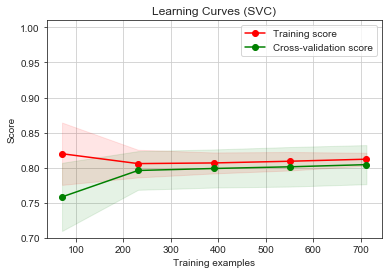

In [83]:


cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

title = "Learning Curves (SVC)"
estimator = SVC()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

looks it has high bias 
- To fix this we can do :
    
    Training score (red line) decreases and plateau
        Indicates underfitting
        High bias
    Cross-validation score (green line) stagnating throughout
        Unable to learn from data
    Low scores (high errors)
        Should tweak model (perhaps increase model complexity)
        
        Decreasing λ: Fixes high bias

    

Now that we have the highest value to be the svc we run that on our test data set.

In [84]:
X_test

,Fare,Family_member,Embarked_Q,Embarked_S,Sex_male,Age_cat_Baby,Age_cat_Child,Age_cat_Teenager,Age_cat_Student,Age_cat_Young Adult,Age_cat_Adult,Age_cat_Senior
891,-0.496484,-0.552780,1,0,1,0,0,0,0,1,0,0
892,-0.511329,0.105516,0,1,0,0,0,0,0,0,1,0
893,-0.463215,-0.552780,1,0,1,0,0,0,0,0,0,1
894,-0.481566,-0.552780,0,1,1,0,0,0,0,1,0,0
895,-0.416668,0.763813,0,1,0,0,0,0,1,0,0,0
896,-0.471495,-0.552780,0,1,1,0,0,1,0,0,0,0
897,-0.500065,-0.552780,1,0,0,0,0,0,0,1,0,0
898,-0.117465,0.763813,0,1,1,0,0,0,0,1,0,0
899,-0.507226,-0.552780,0,0,0,0,0,1,0,0,0,0
900,-0.204294,0.763813,0,1,1,0,0,0,1,0,0,0


In [85]:
Y_pred = clf_linSVM.predict(X_test)

In [86]:
Y_pred

array([0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [87]:
test['predicted_survical']=Y_pred

/Users/nasim/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [88]:
test

,Age,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Title,Family_member,Age_cat,predicted_survical
891,34.5,Q,7.8292,"Kelly, Mr. James",0,892,male,0,NaN,330911,Mr,0,Young Adult,0.0
892,47.0,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,female,1,NaN,363272,Mrs,1,Adult,1.0
893,62.0,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,male,0,NaN,240276,Mr,0,Senior,0.0
894,27.0,S,8.6625,"Wirz, Mr. Albert",0,895,male,0,NaN,315154,Mr,0,Young Adult,0.0
895,22.0,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,female,1,NaN,3101298,Mrs,2,Student,0.0
896,14.0,S,9.2250,"Svensson, Mr. Johan Cervin",0,897,male,0,NaN,7538,Mr,0,Teenager,0.0
897,30.0,Q,7.6292,"Connolly, Miss. Kate",0,898,female,0,NaN,330972,Miss,0,Young Adult,1.0
898,26.0,S,29.0000,"Caldwell, Mr. Albert Francis",1,899,male,1,NaN,248738,Mr,2,Young Adult,0.0
899,18.0,C,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,900,female,0,NaN,2657,Mrs,0,Teenager,1.0
900,21.0,S,24.1500,"Davies, Mr. John Samuel",0,901,male,2,NaN,A/4 48871,Mr,2,Student,0.0


Answering the questions :
1.  What is the average age of the female passengers in the trainings data?

In [90]:
train_passenger[train_passenger["Sex"]=='female']['Age'].mean()

27.93846153846154

2.Do you expect passenger “Bowen, Miss. Grace Scott” and “Willard, Miss. Constance” (in the test data) to have survived? Why (not)?

In [91]:
test[test.Name=='Bowen, Miss. Grace Scott']

,Age,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Title,Family_member,Age_cat,predicted_survical
921,45.0,C,262.375,"Bowen, Miss. Grace Scott",0,1267,female,0,NaN,PC 17608,Miss,0,Adult,1.0


In [92]:
test[test.Name=='Willard, Miss. Constance']

,Age,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Title,Family_member,Age_cat,predicted_survical
1156,21.0,S,26.55,"Willard, Miss. Constance",0,1123,female,0,NaN,113795,Miss,0,Student,1.0


According to our model both  “Bowen, Miss. Grace Scott” and “Willard, Miss. Constance” have survived



3- How accurate do you think your predictions are?
With linear svm model we had a 79.9 % mean accuracy. 

4- What can you do to improve your predictions?

So as the learning curve plot shows the model has high bias. 
If a learning algorithm is suffering from high bias, getting more training data will not (by itself) help much.Since we are underfitting the data. Here i ran several models and choose one that had the highest accuracy. If i only had one model choosing different models would have helped. But since we are underfitting the data it could be that 
Adding Title or Cabin information makes the model better. Also I Can play around with the parameters of the model and try to reach a higher accuracy. 

#### Challenges
- I spent most of the time on cleaning the data and thinking about how to manage Cabin and Age features. 
- It was smooth how the ride went.
- Stackoverflow and documentation were really helpful.
- Overall it was really fun to work on this. I will try to submit this as a kernel to kaggle and see what score i get.
